In [2]:
import os
import requests
import io
import chardet
import pandas as pd

In [3]:
# carregando base de dados
url = 'raw.githubusercontent.com'
username = 'brunoFNIR'
repository = 'consumo_cerveja'
file_name = 'Consumo_cerveja_1.csv'
path = f'https://{url}/{username}/{repository}/main/{file_name}'

In [4]:
#download da base de dados
response = requests.get(path)
response.raise_for_status() # gera exception caso nao consiga carregar

with io.BytesIO(response.content) as file_like: # Create a file-like object in memory
    with open('Consumo_cerveja_1.csv', 'wb') as f:
        f.write(file_like.getbuffer())

In [5]:
# evitar erros de "encoding"
with open('Consumo_cerveja_1.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))

# criando data frame
df = pd.read_csv('Consumo_cerveja_1.csv', encoding=result['encoding'])

In [6]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [7]:
df.columns

Index(['Data', 'Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima',
       'Precipitacao', 'Final_de_Semana', 'Consumo'],
      dtype='object')

In [8]:
df

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467


In [10]:
df.isna().sum()

,0
Data,0
Temperatura_Media,0
Temperatura_Minima,0
Temperatura_Maxima,0
Precipitacao,0
Final_de_Semana,0
Consumo,0


In [11]:
df.drop('Data', axis=1, inplace=True)

In [12]:
pd.options.display.float_format = '{:,.2f}'.format

In [13]:
df.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


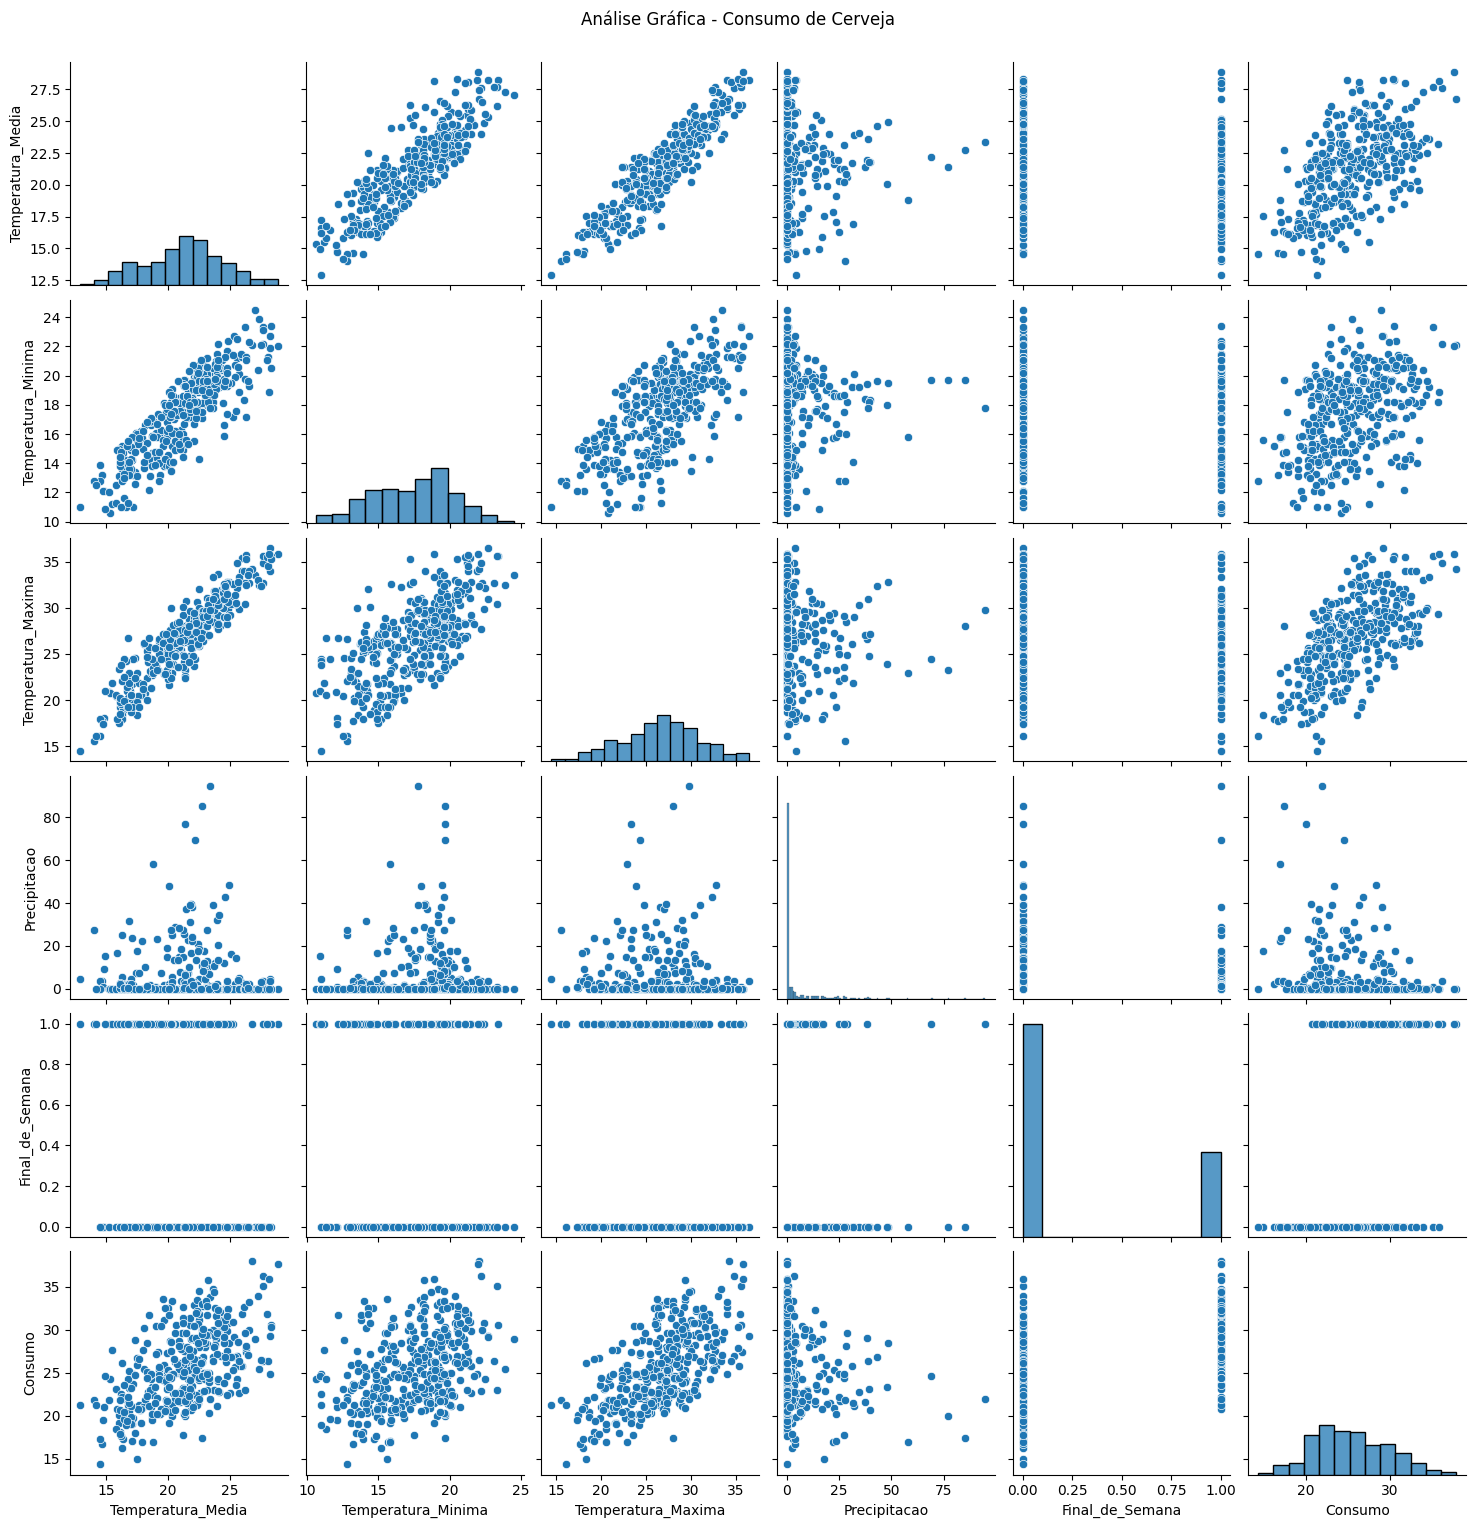

In [16]:
# analise grafica
sns.pairplot(df)
plt.suptitle("Análise Gráfica - Consumo de Cerveja", y = 1.02)
plt.show()

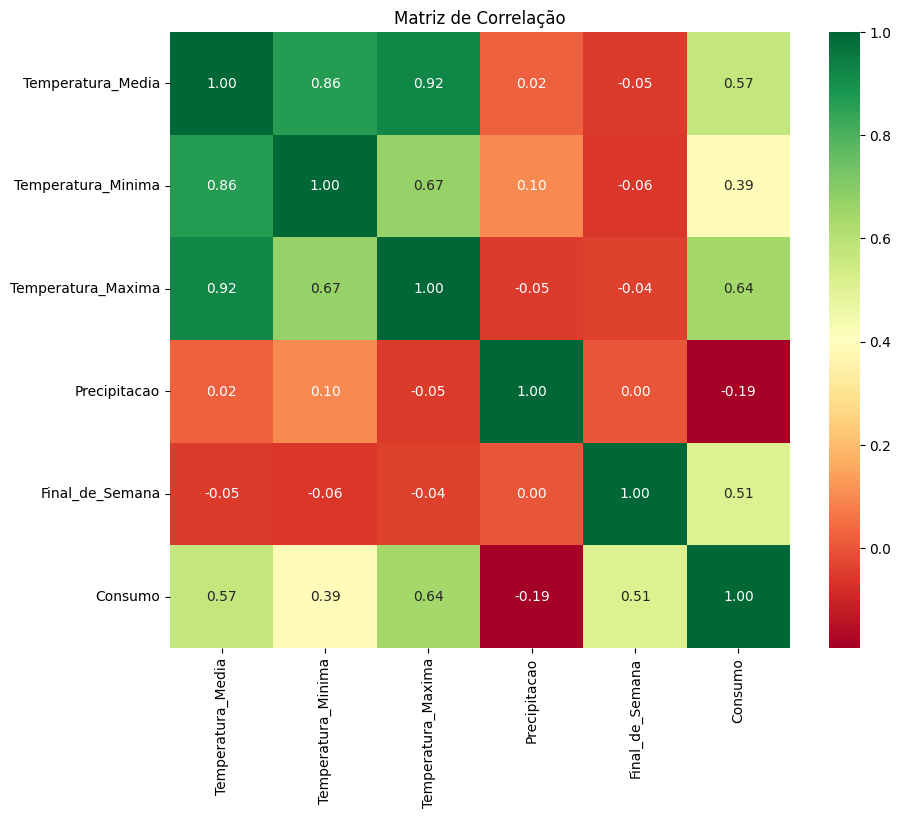

In [17]:
# matriz de correlacao
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn', fmt= ".2f")
plt.title('Matriz de Correlação')
plt.show()

In [18]:
modelo_1 = sm.OLS.from_formula("Consumo ~ Temperatura_Media + Temperatura_Minima + Temperatura_Maxima + Precipitacao + Final_de_Semana", data=df).fit()
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.19e-97
Time:                        19:36:07   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4447      0

In [19]:
modelo_2 = sm.OLS.from_formula("Consumo ~ Temperatura_Media + Precipitacao + Final_de_Semana", data=df).fit()
print(modelo_2.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     234.8
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.79e-84
Time:                        19:36:34   Log-Likelihood:                -860.61
No. Observations:                 365   AIC:                             1729.
Df Residuals:                     361   BIC:                             1745.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             6.4735      0.92

In [20]:
modelo_3 = sm.OLS.from_formula("Consumo ~ Temperatura_Media + Temperatura_Minima + Temperatura_Maxima + Final_de_Semana", data=df).fit()
print(modelo_3.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     207.3
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           4.78e-92
Time:                        19:38:19   Log-Likelihood:                -840.03
No. Observations:                 365   AIC:                             1690.
Df Residuals:                     360   BIC:                             1710.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.3013      0

Verificando Pressupostos

Teste de Normalidade dos resíduos

Ho = distribuição normal : p > 0.05

Ha = distribuição != normal : p <= 0.05

In [21]:
import scipy.stats as stats

In [22]:
# vetores com residuos
residuos_modelo_1 = modelo_1.resid
residuos_modelo_2 = modelo_2.resid
residuos_modelo_3 = modelo_3.resid

In [23]:
residuos_modelo_1

,0
0,-2.69
1,0.19
2,-0.77
3,-0.85
4,3.56
...,...
360,2.62
361,1.84
362,0.37
363,-0.60


In [24]:
residuos_modelo_2

,0
0,-3.94
1,-0.19
2,-1.73
3,-1.95
4,2.42
...,...
360,1.46
361,0.61
362,-1.61
363,-3.49


In [25]:
residuos_modelo_3

,0
0,-2.20
1,0.61
2,-0.30
3,-0.45
4,4.01
...,...
360,2.33
361,2.33
362,0.34
363,-0.34


In [26]:
def normalidade_residuos (residuos):
    estatistica, p = stats.shapiro(residuos)
    print("=" * 40)
    print('Estatística de teste: {}'.format(estatistica))
    print('p-valor: {}'.format(p))
    print("=" * 40)

In [27]:
normalidade_residuos(residuos_modelo_1)
normalidade_residuos(residuos_modelo_2)
normalidade_residuos(residuos_modelo_3)

Estatística de teste: 0.979816710054678
p-valor: 5.457394776921887e-05
Estatística de teste: 0.9830909853935433
p-valor: 0.00028038445918355235
Estatística de teste: 0.9891673407689267
p-valor: 0.008312472534170197


Apenas o primeiro modelo possui distruibuição normal

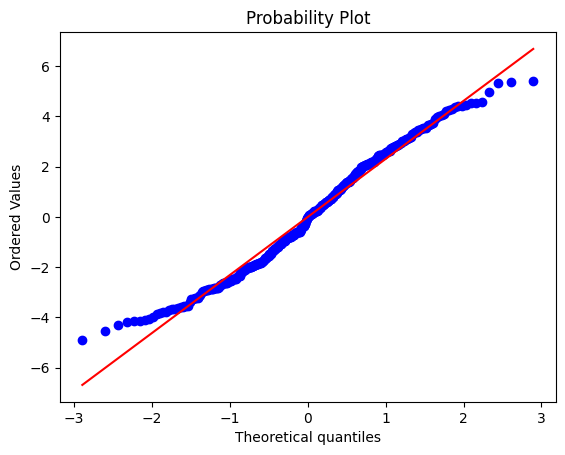

In [28]:
stats.probplot(residuos_modelo_1, dist='norm', plot=plt)
plt.show()

Análise da Homocedasticidade dos resíduos (resíduos com variação constante)

In [33]:
def homocedasticidade_residuos(residuos, model):
  plt.scatter(y=residuos, x=model.predict(), color='red')
  plt.hlines(y=0, xmin=15, xmax=40, color='orange')
  plt.ylabel('Resíduos')
  plt.xlabel('Valores Preditos')
  plt.show()

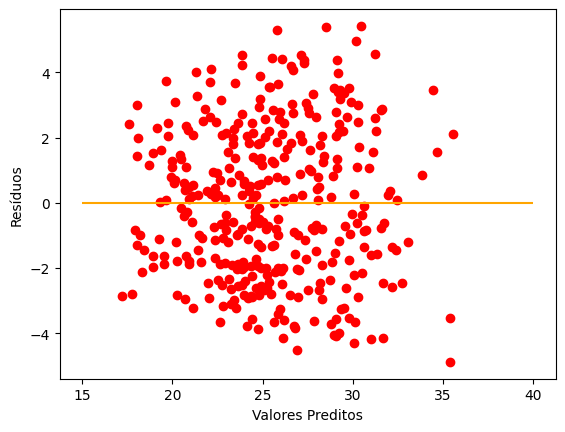

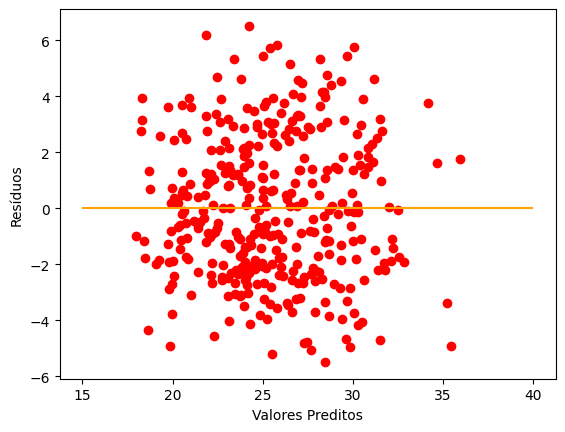

In [34]:
homocedasticidade_residuos(residuos_modelo_1, modelo_1)
homocedasticidade_residuos(residuos_modelo_2, modelo_2)

Ambos os modelos aparentam apresentar variancia constante

Ausencia de Multicolinearidade

Atenção a valores com r > 0,7

Considerada multicolinearidade quando r > 0.9.

In [35]:
variaveis_modelo_1 = df[['Temperatura_Media', 'Temperatura_Minima', 'Temperatura_Maxima', 'Precipitacao', 'Final_de_Semana']]
corr_modelo_1 = variaveis_modelo_1.corr()

Usando Fator de Inflação de Variância (VIF)

Esse valor deve ser menor que 5!

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [37]:
vif_modelo_1 = add_constant(variaveis_modelo_1)

In [38]:
pd.Series([variance_inflation_factor(vif_modelo_1.values, i)
          for i in range(vif_modelo_1.shape[1])],
          index=vif_modelo_1.columns)

,0
const,47.89
Temperatura_Media,23.91
Temperatura_Minima,6.51
Temperatura_Maxima,11.29
Precipitacao,1.04
Final_de_Semana,1.00


Análise do modelo

- Intercept e Coeficiente

- p_valor para cada coeficiente < 0,05 (estatisticamente significativos).

- Adjusted R-squared (explicação do modelo através dos dados).

- p_valor da estatística F < 0.05 (valida o modelo de regressão).

In [39]:
print(modelo_1.summary())

                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     187.1
Date:                Thu, 23 Jan 2025   Prob (F-statistic):           1.19e-97
Time:                        19:50:21   Log-Likelihood:                -824.07
No. Observations:                 365   AIC:                             1660.
Df Residuals:                     359   BIC:                             1684.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              6.4447      0

In [41]:
df['previsao'] = modelo_1.fittedvalues

In [42]:
df.head(10)

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo,previsao
0,27.30,23.90,32.50,0.00,0,25.46,28.15
1,27.02,24.50,33.50,0.00,0,28.97,28.79
2,24.82,22.40,29.90,0.00,1,30.81,31.58
3,23.98,21.50,28.60,1.20,1,29.80,30.65
4,23.82,21.00,28.30,0.00,0,28.90,25.34
5,23.78,20.10,30.50,12.20,0,28.22,26.10
6,24.00,19.50,33.70,0.00,0,29.73,28.92
7,24.90,19.50,32.80,48.60,0,28.40,25.56
8,28.20,21.90,34.00,4.40,0,24.89,28.95
9,26.76,22.10,34.20,0.00,1,37.94,34.47
